# Household energy consumption

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet

In [7]:
path_data = r"C:\Users\LaurèneDAVID\Documents\Teaching\Educational_apps\data-hec-AI-DS\household_power_consumption.txt"
data = pd.read_csv(path_data, low_memory=False, sep=";")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [9]:
for col in data.columns[2:]:
    data[col] = data[col].apply(lambda x: np.nan if x=="?" else x)
    data[col] = data[col].astype(float)

In [10]:
# Average energy consumption to daily measurements
data_clean = data.drop(columns=["Time"]).groupby("Date").mean().reset_index()
data_clean["Date"] = pd.to_datetime(data_clean["Date"], format="%d/%m/%Y")

In [11]:
data_clean.tail()

Date  Global_active_power  Global_reactive_power     Voltage  \
1437 2010-08-09             0.371572               0.119092  241.069264   
1438 2007-09-09             1.166321               0.145244  238.922146   
1439 2008-09-09             0.805315               0.125465  239.781667   
1440 2009-09-09             1.056489               0.155258  241.308507   
1441 2010-09-09             0.860218               0.116635  240.603215   

      Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1437          1.638472        0.000000        0.357639        2.806944  
1438          5.054028        1.516667        3.081944        6.411806  
1439          3.464444        0.163889        0.314583        5.366667  
1440          4.491250        0.669444        2.661111        7.410417  
1441          3.701667        1.259028        1.477778        4.872222

In [12]:
for col in data_clean.columns[1:]:
    data_clean[col] = data_clean[col].round(2)

In [13]:
data_clean["Date"] = pd.to_datetime(data_clean["Date"])
data_clean.sort_values(by=["Date"], inplace=True)
data_clean.drop(columns=["Global_reactive_power","Voltage"], inplace=True)

In [15]:
data_clean

Date  Global_active_power  Global_intensity  Sub_metering_1  \
341 2006-12-16                 3.05             13.08            0.00   
389 2006-12-17                 2.35             10.00            1.41   
437 2006-12-18                 1.53              6.42            0.74   
485 2006-12-19                 1.16              4.93            0.58   
580 2006-12-20                 1.55              6.47            0.00   
..         ...                  ...               ...             ...   
675 2010-11-22                 1.42              6.01            3.37   
723 2010-11-23                 1.10              4.67            1.30   
771 2010-11-24                 1.25              5.25            0.76   
819 2010-11-25                 0.99              4.17            0.75   
867 2010-11-26                 1.18              4.96            0.86   

     Sub_metering_2  Sub_metering_3  
341            1.38           12.44  
389            2.91            9.26  
437            1.82            9.73  
485            5.28            4.30  
580            1.84            9.77  
..              ...             ...  
675            1.47            7.04  
723            0.32            5.29  
771            1.98            8.49  
819            0.30            3.52  
867            0.30            7.91  

[1442 rows x 6 columns]

In [18]:
path_clean_data = r"C:\Users\LaurèneDAVID\Documents\Teaching\Educational_apps\app-hec-AI-DS\data\household\household_power_consumption_clean.pkl"
data_clean.to_pickle(path_clean_data)

In [16]:
data_clean.rename({"Date":"ds", "Global_active_power":"y"},axis=1, inplace=True)
data_clean.dropna(inplace=True)

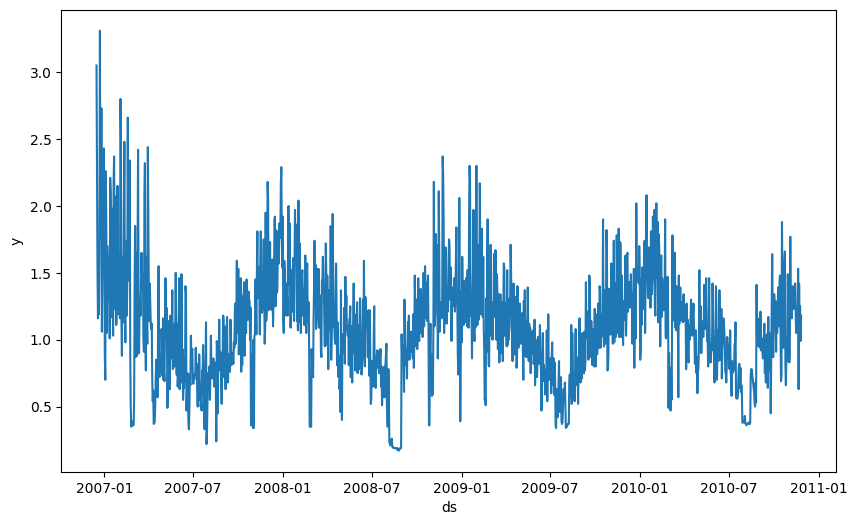

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_clean, x="ds", y="y")
plt.show()

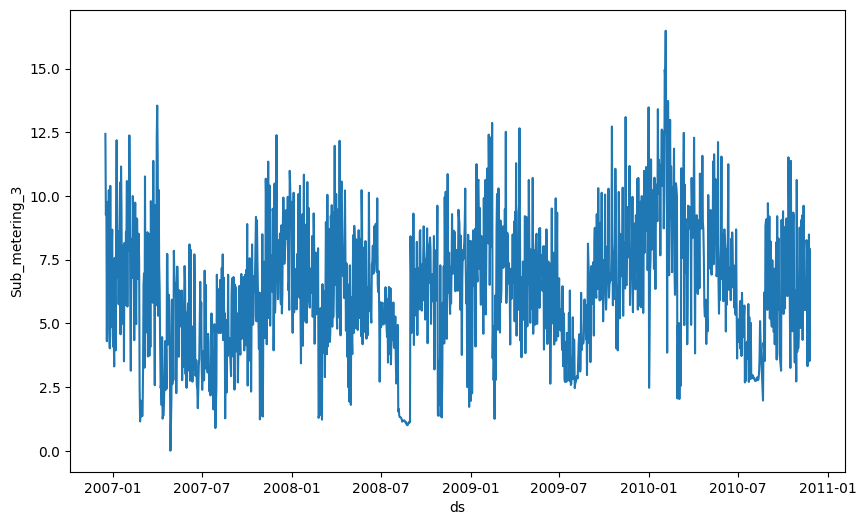

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_clean, x="ds", y="Sub_metering_3")
plt.show()

In [20]:
cutoff_date = '2010-01-01'

train = data_clean[data_clean["ds"] <= cutoff_date]
test = data_clean[data_clean["ds"] > cutoff_date]

m = Prophet(daily_seasonality=False)
# for col in ["Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]:
#     m.add_regressor(col)

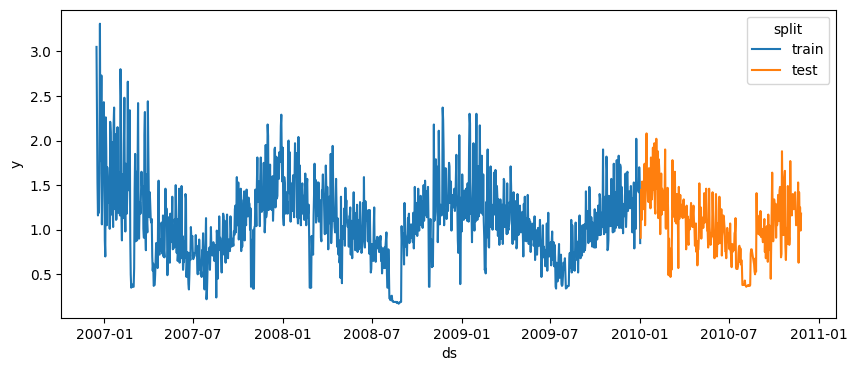

In [21]:
train_plot = train.copy()
train_plot["split"] = ["train"]*len(train_plot)

test_plot = test.copy()
test_plot["split"] = ["test"]*len(test_plot)

data_clean_plot = pd.concat([train_plot, test_plot])

plt.figure(figsize=(10,4))
sns.lineplot(data=data_clean_plot, x="ds", y="y", hue="split")
plt.show()

In [22]:
m.fit(train)

12:14:32 - cmdstanpy - INFO - Chain [1] start processing
12:14:32 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
forecast = m.predict(test)

c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


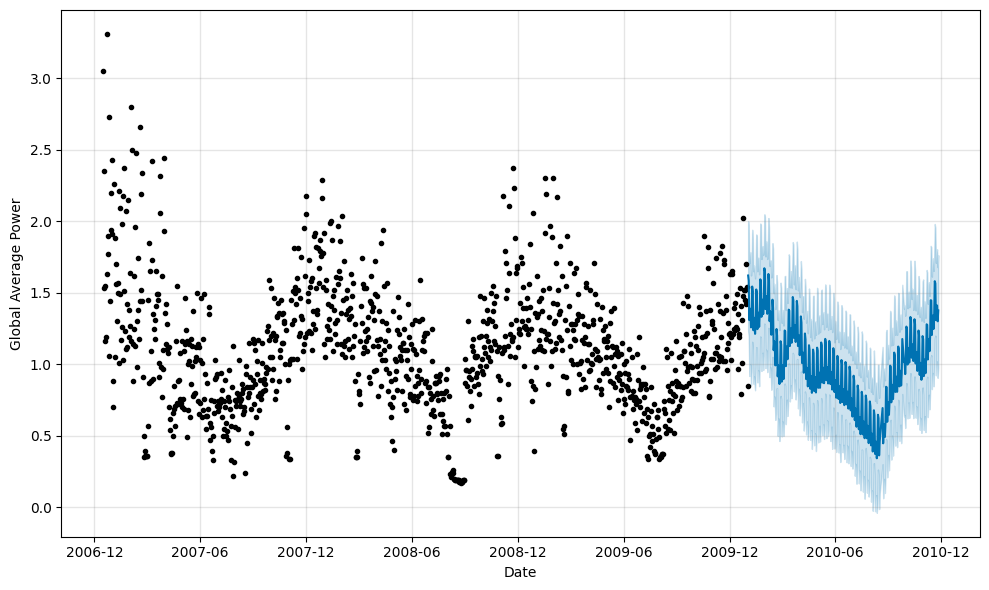

In [25]:
m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Global Average Power')
plt.show()

In [27]:
df_results = test_plot.merge(forecast, on="ds", how="left")[["ds","y","yhat"]]
df_results = df_results.melt(id_vars="ds")
df_results["variable"] = df_results["variable"].map({"y":"true values", "yhat":"predicted values"})
df_results.columns = ["Date", "Variable", "Global Active Power"]

In [28]:
import plotly.express as px

# Create the first line plot
fig = px.line(df_results, x="Date", y="Global Active Power", color="Variable", 
              color_discrete_sequence=["black", "red"], line_dash = 'Variable')

# fig.update_traces(line=dict(dash=['solid', 'dash']), 
#                   name=['Line 1', 'Line 2'])

fig.update_layout(
    title='True vs Predicted Values',
    xaxis_title='Date',
    yaxis_title='Global Active Power',
    #legend=dict(title='Lines'),
    width=1200,  # Set the width of the figure
    height=600  # Set the height of the figure
)


# Show the plot
fig.show()

# df = px.data.gapminder().query("continent == 'Oceania'")
# fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
# fig.show()

In [29]:
from sklearn.metrics import root_mean_squared_error
y_true = test_plot["y"]
y_pred = forecast["yhat"]

root_mean_squared_error(y_true, y_pred)

0.2632010945496168

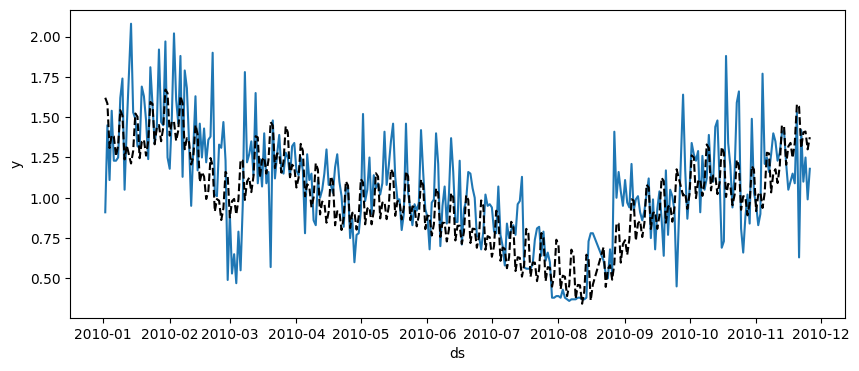

In [30]:
plt.figure(figsize=(10,4))
sns.lineplot(data=test_plot, x="ds", y="y") # true (in blue)
sns.lineplot(data=forecast, x="ds", y="yhat", color="black", linestyle='--') # predicted (in black)
plt.show()

<Axes: >

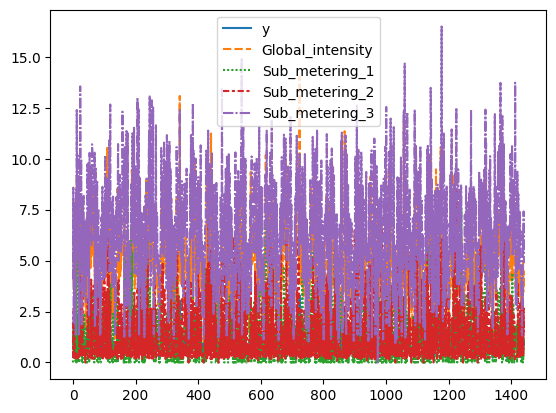

In [31]:
sns.lineplot(data=data_clean)

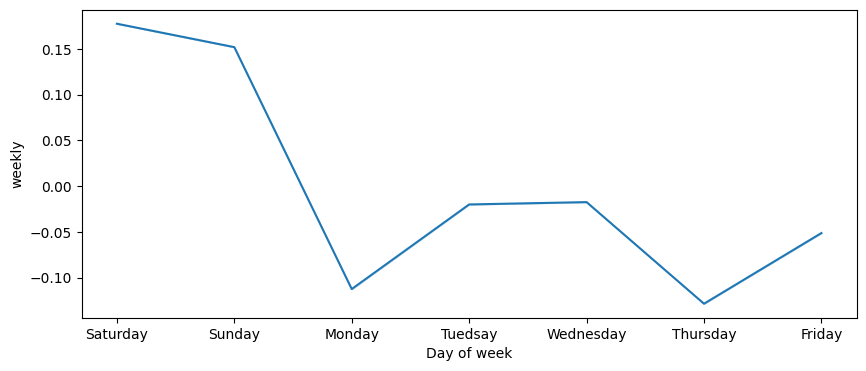

In [32]:
days_week = dict(zip(np.arange(1,8),["Monday", "Tuedsay", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]))
forecast_weekly = forecast.copy()
forecast_weekly["dayweek"] = forecast_weekly["ds"].apply(lambda x: x.isoweekday()).map(days_week)

plt.figure(figsize=(10,4))
df_weekly = forecast_weekly[["weekly","dayweek"]]
sns.lineplot(data=df_weekly, x="dayweek", y="weekly")
plt.xlabel("Day of week")
plt.show()

c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

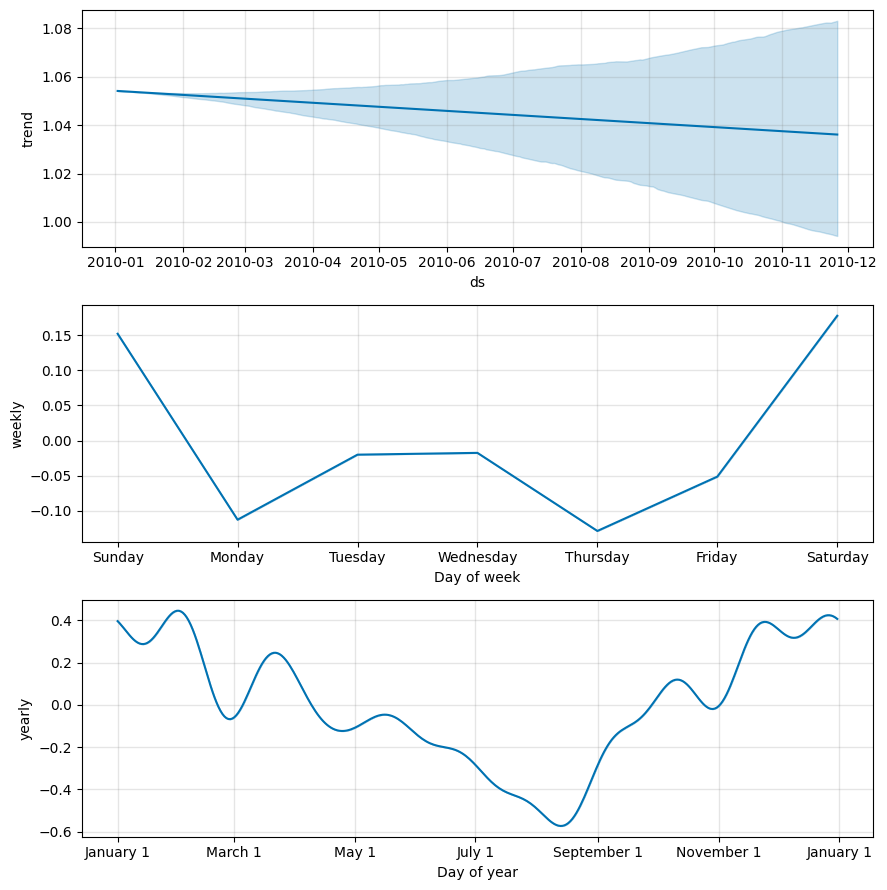

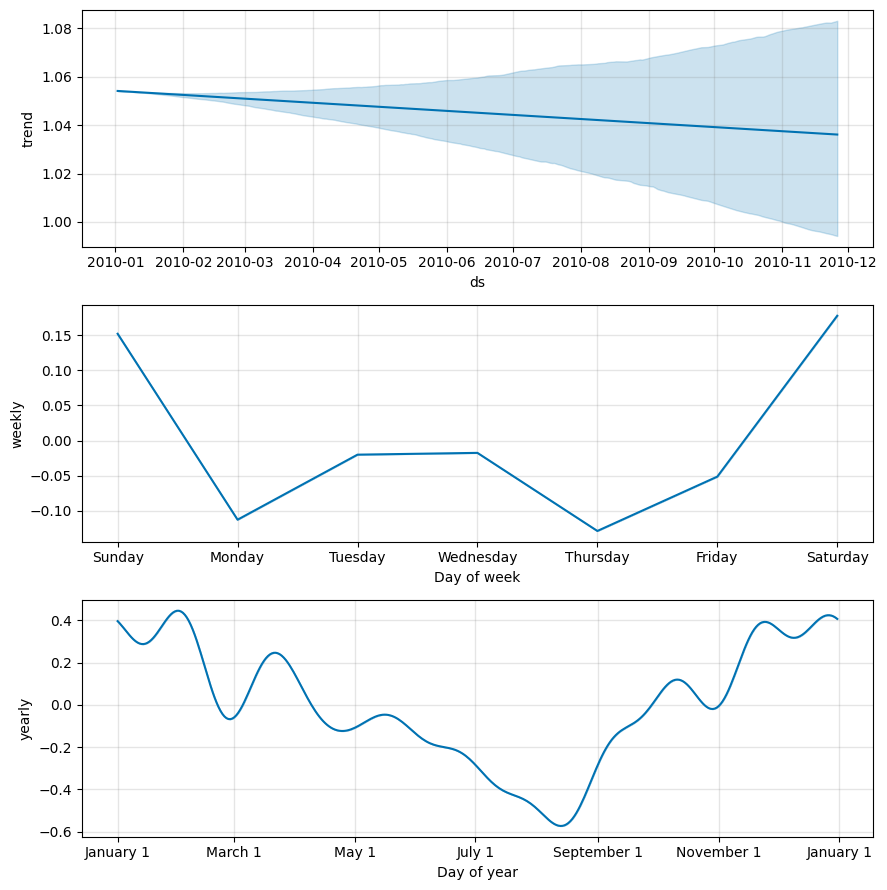

In [35]:
m.plot_components(forecast)

In [57]:
forecast_year = forecast[["ds","yearly"]].copy()
forecast_year["ds_year"] = forecast_year["ds"].apply(lambda x: x.strftime("%B %d"))
forecast_year["ds"] = forecast_year["ds"].apply(lambda x: x.strftime("%m-%d"))
forecast_year.sort_values(by=["ds"], inplace=True)

In [63]:
forecast_year = forecast_year.groupby(["ds","ds_year"]).mean().reset_index()
px.area(forecast_year, x="ds_year", y="yearly")